## FPUT (simple case)

Consider the hamiltonian below
\begin{equation}
H(\vec{q},\vec{p})=\sum_{n=0}^{N-1}\Bigr[ \frac{p_n^2}{2}+k\frac{(q_{n+1}-q_n)^2}{2}\Bigr]\\
\vec{q} = [q_1, \dots, q_n,\dots, q_N]\\
\vec{p} = [p_1, \dots, p_n, \dots,p_N]\\
\end{equation}

With the initial condition of the following form:\
\begin{equation}
q_n^{(t=0)}=Asin(\frac{\pi n}{N})\\p_n(0)=0
\end{equation}

<!-- The dependence between $q_n$ and $p_n$ are from the hamiltonian $H_n$ is
\begin{equation}
p_n = \sqrt{2E_n-k(q_{n+1}-q_n)^2}, \\
E_n=H_n, H = \sum_{n=0}^{N-1}H_n
\end{equation} -->

then, $\dot{q_n}$ and $\dot{p_n}$ would be

\begin{equation}
\dot{q_n}^{(t)}=\frac{\partial H}{\partial p_n}=p_n^{(t)}
\\
\dot{p_n}^{(t)}=-\frac{\partial H}{\partial q_n}=k(q_{n-1}^{(t)}+q_{n+1}^{(t)}-2q_n^{(t)})
\end{equation}



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initial variables
# Assumes that len(p)=len(q)>=3

M = 4 # total number of oscillators
k = 0.5 # spring constant
A = 0.8 # amplitude
q = A*np.sin(np.linspace(0,np.pi,M)) # oscillator position
p = np.zeros(M) # oscillator momentum

## p_dot_update calculates p_dot at one time step
def p_dot_update(p_dot, q):
    for i in range(M):
        if i==0: # left boundary case
            p_dot[i]=k*(q[i+1]-2*q[i])
        elif i==len(q)-1: # right boundary case
            p_dot[i]=k*(q[i-1]-2*q[i])
        else:
            p_dot[i]=k*(-2*q[i]+q[i-1]+q[i+1])
    return p_dot

# def p_dot_update_2()


For Euler method, $q_n$ and $p_n$ are calculated in a iterative fashion:

\begin{equation}
q_n^{(t+dt)}=q_n^{(t)}+dt\cdot \dot{q_n}^{(t)}
\\
p_n^{(t+dt)}=p_n^{(t)}+dt\cdot \dot{p_n}^{(t)}
\end{equation}


<Figure size 640x480 with 0 Axes>

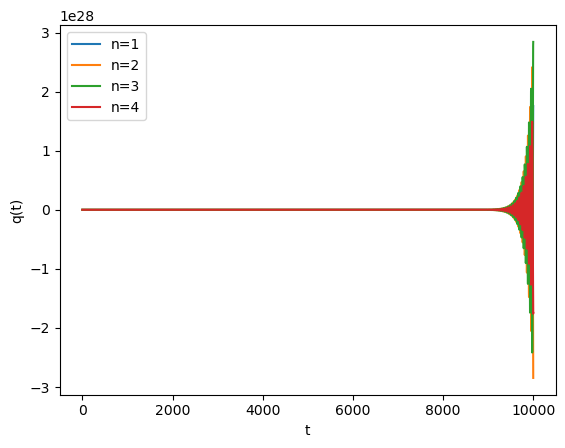

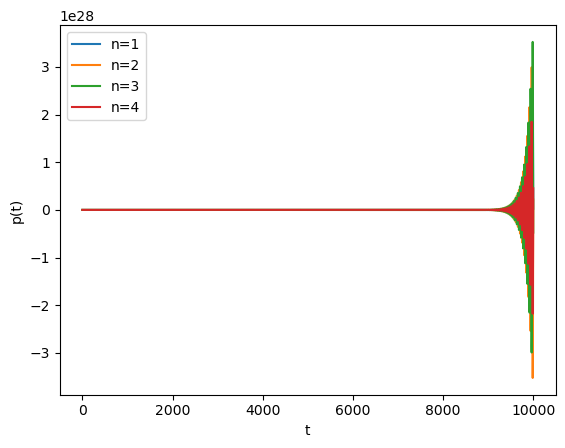

<Figure size 640x480 with 0 Axes>

In [2]:
## Using Euler Method to integrate qdot and pdot
t_a = 0.0 # start of the interval
t_b = 1000.0 # end of the interval
N = 10000 # number of steps
dt = (t_b-t_a)/N # size of a single step
# t_points = np.arange(ta,tb,dt)

## Initialize p_dot and q_dot at time t=0
q_dot = p
p_dot_0 = np.zeros(M) # p_dot at t=0
p_dot = p_dot_update(p_dot_0,q)

q_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's position
p_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's momentum

## Evolve both p_matrix and q_matrix based on EOM by Euler method
for t in range(1,N):
    for n in range(M):
        q[n] = q_dot[n]*dt + q[n] #first update p and q, then update p_dot and q_dot
        p[n] = p_dot[n]*dt + p[n]
        p_dot = p_dot_update(p_dot,q) 
        q_dot = p # In our case, q_dot just equals to p
    q_matrix[t:]=q
    p_matrix[t:]=p

## Creating a label array for plotting
label_n = []
for i in range(M):
    label_n.append("n={number}".format(number=i+1))

q_plot = plt.plot(q_matrix)
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend(q_plot,label_n)
plt.figure()

p_plot = plt.plot(p_matrix)
plt.xlabel("t")
plt.ylabel("p(t)")
plt.legend(p_plot,label_n)
plt.figure()


For Runge Kutta 4 method,$q_n$ and $p_n$ are calculated in the following way:<br>
At time $t$,<br>
##### First, calculate $k_{1q}^{(t)}, k_{1p}^{(t)}$:
\begin{equation}
\dot{q_n}^{(t)} = p_n^{(t)}; (k_{1q}^{(t)})\\
\
q_n^{(t+dt/2)}=q_n^{(t)}+\frac{dt}{2}\cdot k_{1q}^{(t)};(intermediate \; value)
\\
\dot{p_n}^{(t+dt/2)}=k(q_{n-1}^{(t+dt/2)}+q_{n+1}^{(t+dt/2)}-2q_{n}^{(t+dt/2)}); (k_{1p}^{(t)})
\\
p_n^{(t+dt/2)}=p_n^{(t)}+\frac{dt}{2}\cdot k_{1p}^{(t)};(intermediate \; value)
\\
\end{equation}

##### 2nd, calculate $k_{2q}^{(t)}, k_{2p}^{(t)}$:
\begin{equation}
\dot{q_n}^{(t)} = p_n^{(t+dt/2)}; (k_{2q}^{(t)})\\
\
q_n^{(t+dt/2)}=q_n^{(t)}+\frac{dt}{2}\cdot k_{2q}^{(t)}
\\
\dot{p_n}^{(t+dt/2)}=k(q_{n-1}^{(t+dt/2)}+q_{n+1}^{(t+dt/2)}-2q_{n}^{(t+dt/2)}); (k_{2p}^{(t)})
\\
p_n^{(t+dt/2)}=p_n^{(t)}+\frac{dt}{2}\cdot k_{2p}^{(t)}
\\
\end{equation}

##### 3rd, calculate $k_{3q}^{(t)}, k_{3p}^{(t)}$:
\begin{equation}
\dot{q_n}^{(t)} = p_n^{(t+dt/2)}; (k_{3q}^{(t)})\\
\
q_n^{(t+dt/2)}=q_n^{(t)}+\frac{dt}{2}\cdot k_{3q}^{(t)}
\\
\dot{p_n}^{(t+dt/2)}=k(q_{n-1}^{(t+dt/2)}+q_{n+1}^{(t+dt/2)}-2q_{n}^{(t+dt/2)}); (k_{3p}^{(t)})
\\
p_n^{(t+dt/2)}=p_n^{(t)}+\frac{dt}{2}\cdot k_{3p}^{(t)}
\\
\end{equation}


##### 4th, calculate $k_{4q}^{(t)}, k_{4p}^{(t)}$:

\begin{equation}
\dot{q_n}^{(t)} = p_n^{(t+dt/2)}; (k_{4q}^{(t)})\\
\dot{p_n}^{(t+dt/2)}=k(q_{n-1}^{(t+dt/2)}+q_{n+1}^{(t+dt/2)}-2q_{n}^{(t+dt/2)}); (k_{4p}^{(t)})
\end{equation}

##### Finally, obtain $p_n^{(t+dt)}, q_n^{(t+dt)}$ throught a weight sum of $k_1, k_2, k_3, k_4$:
\begin{equation}
q_n^{(t+dt)}=q_n^{(t)}+\frac{1}{6}\cdot(k^{(t)}_{1q}+2k^{(t)}_{2q}+2k^{(t)}_{3q}+k^{(t)}_{4q})\cdot dt\\
p_n^{(t+dt)}=p_n^{(t)}+\frac{1}{6}\cdot(k^{(t)}_{1p}+2k^{(t)}_{2p}+2k^{(t)}_{3p}+k^{(t)}_{4p})\cdot dt
\end{equation}

In [5]:
## Using Runge Kutta 4 Method to integrate qdot and pdot

t_a = 0.0 # start of the interval
t_b = 1000.0 # end of the interval
N = 10000 # number of steps
dt = (t_b-t_a)/N # size of a single step
# t_points = np.arange(ta,tb,dt)

## Initialize p_dot and q_dot at time t=0
q_dot = p
p_dot_0 = np.zeros(M) # p_dot at t=0
p_dot = p_dot_update(p_dot_0,q)

q_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's position
p_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's momentum

## Evolve both p_matrix and q_matrix based on EOM by RK-4 method
for t in range(1,N):
    for n in range(M):
        q[n] = q_dot[n]*dt + q[n] #first update p and q, then update p_dot and q_dot
        p[n] = p_dot[n]*dt + p[n]
        
        ## k_1
        p_dot = p_dot_update(p_dot,q) 
        q_dot = p # In our case, q_dot just equals to p
        
        ## k_2
        p_dot = 
        
    q_matrix[t:]=q
    p_matrix[t:]=p

## Creating a label array for plotting
label_n = []
for i in range(M):
    label_n.append("n={number}".format(number=i+1))

q_plot = plt.plot(q_matrix)
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend(q_plot,label_n)
plt.figure()



\begin{equation}
Euler: f^*(t)=f(0)+f'(0)\cdot t\\
RK-2: f^*(t)=f(0)+f'(\frac{t}{2})\cdot t\
\end{equation}

#### Claim: Runge Kutta 2 (midpoint) is a truncated version of Taylor expansion with error = $O(t^3)$

the phase diagram is:


<Figure size 640x480 with 0 Axes>

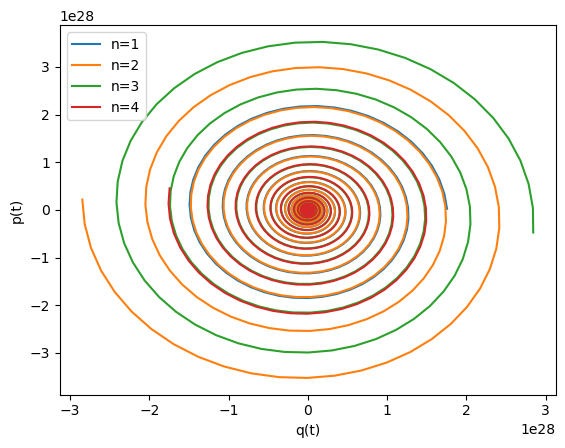

<Figure size 640x480 with 0 Axes>

In [4]:
## Phase diagram

for n in range(q_matrix.shape[1]):
    label_n = "n={number}".format(number=n+1)
    plt.plot(q_matrix[:,n],p_matrix[:,n], label=label_n)
        
print("the phase diagram is:")
plt.xlabel("q(t)")
plt.ylabel("p(t)")
plt.legend()
plt.figure()


## Comments
#### From phase diagram
1. Some curves/oscillators are not totally symmetrical, is that normal? (I imagine that a perfect integrable should have a perfect
loop shape.)
#### Answer: Clayton said let's make time period longer and now it does look it's a closed looping:)
2. Euler method seems not a very accurate method for solving ODE, maybe use other more accurate method like runge kutta?
#### Answer: Yes